## Install Lib

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade --force-reinstall numpy catboost pandas scipy scikit-learn matplotlib seaborn

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

## Import Library

In [1]:
import os
import json
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.base import clone
from sklearn.model_selection import ParameterSampler

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score,
    GridSearchCV, RandomizedSearchCV, learning_curve
)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, confusion_matrix,
    classification_report, f1_score, auc, precision_recall_curve, average_precision_score
)
import joblib
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from IPython.display import display, HTML

warnings.filterwarnings('ignore', category=UserWarning)

## Variable

In [2]:
project_path = "/content/drive/MyDrive/Data_Analytics"
file_path = f"{project_path}/Dataset/dataset_cleaned_undersampling.csv"
result_path = f"{project_path}/Result/Undersampling"
hyper_path = f"{project_path}/Hyperparameter/Undersampling"
model_path = f"{project_path}/Models/Undersampling"

## Load Dataset

In [ ]:
df = pd.read_csv(file_path)
print(df.shape)
print(df.info())

(2608, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2608 non-null   int64  
 1   Gender          2608 non-null   int64  
 2   BMI             2608 non-null   float64
 3   SBP             2608 non-null   float64
 4   DBP             2608 non-null   float64
 5   FPG             2608 non-null   float64
 6   Chol            2608 non-null   float64
 7   Tri             2608 non-null   float64
 8   HDL             2608 non-null   float64
 9   LDL             2608 non-null   float64
 10  ALT             2608 non-null   float64
 11  AST             2608 non-null   float64
 12  BUN             2608 non-null   float64
 13  CCR             2608 non-null   float64
 14  FFPG            2608 non-null   float64
 15  Smoking         2608 non-null   int64  
 16  Drinking        2608 non-null   int64  
 17  Family_history  2608 n

In [ ]:
df_train = df[df['dataset'] == 'train']
df_val = df[df['dataset'] == 'validation']
df_test = df[df['dataset'] == 'test']

X_train = df_train.drop(columns=['Diabetes', 'dataset'])
y_train = df_train['Diabetes']

X_val = df_val.drop(columns=['Diabetes', 'dataset'])
y_val = df_val['Diabetes']

X_test = df_test.drop(columns=['Diabetes', 'dataset'])
y_test = df_test['Diabetes']

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (2086, 18)
Validation shape: (261, 18)
Test shape: (261, 18)


In [ ]:
numeric_features_to_scale = [
    'Age', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL',
    'ALT', 'AST', 'BUN', 'CCR', 'FFPG'
]
categorical_features = ['Gender', 'Smoking', 'Drinking', 'Family_history']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_to_scale)
    ],
    remainder='passthrough'
)

scaled_x_train = preprocessor.fit_transform(X_train)
scaled_x_val = preprocessor.transform(X_val)
scaled_x_test = preprocessor.transform(X_test)
os.makedirs(model_path, exist_ok=True)
joblib.dump(preprocessor, f"{model_path}/scaler.joblib")

['/content/drive/MyDrive/Data_Analytics/Models/Undersampling/scaler.joblib']

## HyperParameter Tuning

In [ ]:
hyper_file = f"{hyper_path}/parameter.json"
os.makedirs(hyper_path, exist_ok=True)

param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [8, 12, 16, 20],
        'min_samples_split': [10, 20, 40],
        'min_samples_leaf': [5, 10, 15],
        'max_features': ['sqrt', 0.7, 0.8],
        'ccp_alpha': [0, 0.001, 0.005]
    },
    "Decision Tree": {
        'max_depth': [5, 8, 10, 15],
        'min_samples_split': [20, 40, 60],
        'min_samples_leaf': [10, 15, 20],
        'criterion': ['gini', 'entropy'],
        'ccp_alpha': [0, 0.005, 0.01, 0.02]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.03, 0.05, 0.1],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'gamma': [0.1, 0.5, 1, 2],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 3, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 0.9],
        'min_samples_split': [10, 20, 40],
        'min_samples_leaf': [5, 10, 15],
        'max_features': ['sqrt', 'log2', 0.8]
    },
    "CatBoost": {
        'iterations': [100, 200, 300, 400],
        'learning_rate': [0.03, 0.05, 0.1],
        'depth': [4, 5, 6, 7],
        'l2_leaf_reg': [5, 10, 15, 20],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bylevel': [0.7, 0.8, 0.9],
        'border_count': [32, 64]
    }
}

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}


def tune_model_with_cv(name, model, param_grid, X, y, metric='accuracy', n_iter=20, cv=5):
    print(f"=== Hyperparameter Tuning {name} (CV) ===\n")

    if not param_grid:
        print(f"{name} dilatih dengan parameter default.")
        scores = []

        cv_split = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
        for train_idx, val_idx in cv_split.split(X, y):
            model_clone = clone(model)
            model_clone.fit(X[train_idx], y[train_idx])
            y_pred = model_clone.predict(X[val_idx])

            if metric == 'accuracy':
                score = accuracy_score(y[val_idx], y_pred)
            elif metric == 'f1':
                score = f1_score(y[val_idx], y_pred, average='weighted')
            elif metric == 'auc':
                if hasattr(model_clone, "predict_proba"):
                    y_proba = model_clone.predict_proba(X[val_idx])
                    if len(np.unique(y)) > 2:
                        score = roc_auc_score(y[val_idx], y_proba, multi_class='ovr')
                    else:
                        score = roc_auc_score(y[val_idx], y_proba[:, 1])
                else:
                    score = accuracy_score(y[val_idx], y_pred)
            scores.append(score)

        avg_score = np.mean(scores)
        print(f"Skor rata-rata {metric} untuk {name} (default): {avg_score:.4f}")
        model.fit(X, y)
        return model, model.get_params(), avg_score

    # Random sampling dari grid
    param_combinations = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))
    print(f"Menguji {len(param_combinations)} kombinasi parameter dengan {cv}-Fold CV...")

    best_score = -np.inf
    best_params = None
    best_model = None

    for i, params in enumerate(param_combinations):
        try:
            scores = []
            cv_split = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

            for train_idx, val_idx in cv_split.split(X, y):
                model_instance = clone(model)
                model_instance.set_params(**params)
                model_instance.fit(X[train_idx], y[train_idx])
                y_pred = model_instance.predict(X[val_idx])

                if metric == 'accuracy':
                    score = accuracy_score(y[val_idx], y_pred)
                elif metric == 'f1':
                    score = f1_score(y[val_idx], y_pred, average='weighted')
                elif metric == 'auc':
                    if hasattr(model_instance, "predict_proba"):
                        y_proba = model_instance.predict_proba(X[val_idx])
                        if len(np.unique(y)) > 2:
                            score = roc_auc_score(y[val_idx], y_proba, multi_class='ovr')
                        else:
                            score = roc_auc_score(y[val_idx], y_proba[:, 1])
                    else:
                        score = accuracy_score(y[val_idx], y_pred)
                scores.append(score)

            avg_score = np.mean(scores)

            if avg_score > best_score:
                best_score = avg_score
                best_params = params
                best_model = clone(model).set_params(**params).fit(X, y)

            if (i + 1) % max(1, len(param_combinations) // 10) == 0:
                print(f"  Progress: {i+1}/{len(param_combinations)} kombinasi selesai. Best {metric} so far: {best_score:.4f}")

        except Exception as e:
            print(f"  Error dengan parameter {params}: {str(e)}")
            continue

    if best_model is None:
        print(f"Semua kombinasi parameter gagal. Menggunakan default.")
        model.fit(X, y)
        return model, model.get_params(), -np.inf

    print(f"\nBest {metric} for {name} (CV): {best_score:.4f}")
    print("Parameter terbaik:", best_params)

    return best_model, best_params, best_score

def clean_params_for_json(params):
    cleaned = {}
    for key, value in params.items():
        if isinstance(value, (int, float, str, bool, list, dict)) or value is None:
            cleaned[key] = value
        else:
            pass
    return cleaned

best_models = {}
metrics = {}

if os.path.exists(hyper_file):
    try:
        with open(hyper_file, "r") as f:
            best_models_params_loaded = json.load(f)
        print(f"Loaded best hyperparameters from {hyper_file}")

        for name in models:
            if name in best_models_params_loaded:
                print(f"Loading and fitting model: {name}")
                model_instance = models[name]
                valid_param_keys = model_instance.get_params().keys()
                params_to_set = {k: v for k, v in best_models_params_loaded[name].items() if k in valid_param_keys}

                try:
                    model_instance.set_params(**params_to_set)
                except ValueError as e:
                     print(f"Warning: Could not set some params for {name}: {e}")
                     print(f"Attempting with params: {params_to_set}")

                model_instance.fit(scaled_x_train, y_train)
                best_models[name] = model_instance

                val_acc = accuracy_score(y_val, model_instance.predict(scaled_x_val))
                metrics[name] = {'validation_accuracy': val_acc}
                print(f"  Validation accuracy for {name}: {val_acc:.4f}")
            else:
                print(f"Warning: No parameters found for {name} in {hyper_file}. Skipping loading, will train with defaults if needed later.")

        print("Finished loading and fitting models from parameters.")

    except json.JSONDecodeError:
        print(f"Error reading {hyper_file}. File might be corrupted. Starting tuning...")
        os.remove(hyper_file) # Hapus file yang rusak agar bisa dibuat ulang
    except Exception as e:
        print(f"An unexpected error occurred while loading parameters: {e}. Starting tuning...")

if not os.path.exists(hyper_file):
    print("\nStarting hyperparameter tuning process with cross-validation...")
    best_models_params_to_save = {}
    metrics = {}

    for name in models:
        print(f"\nTuning {name}...")
        tuned_model, best_params, val_score = tune_model_with_cv(
            name=name,
            model=models[name],
            param_grid=param_grids.get(name, {}),
            X=scaled_x_train,
            y=y_train,
            metric='accuracy',
            n_iter=20,
            cv=5  # jumlah fold
        )

        best_models[name] = tuned_model
        best_models_params_to_save[name] = best_params
        metrics[name] = {'cv_validation_accuracy': val_score}

    cleaned_best_models_params = {
        name: clean_params_for_json(params)
        for name, params in best_models_params_to_save.items()
    }

    try:
        with open(hyper_file, "w") as f:
            json.dump(cleaned_best_models_params, f, indent=4)
        print(f"\nBest hyperparameters saved to {hyper_file}")

        metrics_file = f"{hyper_path}/validation_metrics.json"
        with open(metrics_file, "w") as f:
            json.dump(metrics, f, indent=4)
        print(f"Validation metrics saved to {metrics_file}")
    except Exception as e:
        print(f"\nError saving hyperparameters to {hyper_file}: {e}")

    print("Finished tuning models.")

print("\nValidation Performance Summary:")
for name, metric_values in metrics.items():
    acc = metric_values.get('cv_validation_accuracy', metric_values.get('validation_accuracy', None))
    if acc is not None:
        print(f"{name}: Accuracy = {acc:.4f}")
    else:
        print(f"{name}: Accuracy = N/A")

print("\nSaving trained models to .pkl files...")
for name, model in best_models.items():
    model_filename = os.path.join(model_path, f"{name}.pkl")
    try:
        joblib.dump(model, model_filename)
        print(f"Model '{name}' saved successfully to {model_filename}")
    except Exception as e:
        print(f"Error saving model '{name}' to {model_filename}: {e}")
print("Finished saving models.")


Starting hyperparameter tuning process with cross-validation...

Tuning Random Forest...
=== Hyperparameter Tuning Random Forest (CV) ===

Menguji 20 kombinasi parameter dengan 5-Fold CV...
  Progress: 2/20 kombinasi selesai. Best accuracy so far: 0.9185
  Progress: 4/20 kombinasi selesai. Best accuracy so far: 0.9185
  Progress: 6/20 kombinasi selesai. Best accuracy so far: 0.9185
  Progress: 8/20 kombinasi selesai. Best accuracy so far: 0.9190
  Progress: 10/20 kombinasi selesai. Best accuracy so far: 0.9190
  Progress: 12/20 kombinasi selesai. Best accuracy so far: 0.9200
  Progress: 14/20 kombinasi selesai. Best accuracy so far: 0.9200
  Progress: 16/20 kombinasi selesai. Best accuracy so far: 0.9200
  Progress: 18/20 kombinasi selesai. Best accuracy so far: 0.9200
  Progress: 20/20 kombinasi selesai. Best accuracy so far: 0.9219

Best accuracy for Random Forest (CV): 0.9219
Parameter terbaik: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 0

## ModelEvaluator Class

In [ ]:
class ModelEvaluator:
    def __init__(self, project_path, scaling_data, best_models, y_data):
        self.project_path = project_path
        self.scaled_x_train, self.scaled_x_val, self.scaled_x_test = scaling_data
        self.best_models = best_models
        self.y_train, self.y_val, self.y_test = y_data
        self.roc_data = {}
        self.pr_data = {}

    def evaluate(self, model_name):
        model = self.best_models.get(model_name)
        if model is None:
            print(f"❌ Model {model_name} tidak ditemukan!")
            return

        result_save = f"{result_path}/{model_name}/"
        os.makedirs(result_save, exist_ok=True)

        y_pred_val = model.predict(self.scaled_x_val)
        acc_val = model.score(self.scaled_x_val, self.y_val)

        report_val = classification_report(self.y_val, y_pred_val, output_dict=True)
        f1_val = report_val["weighted avg"]["f1-score"]

        cm_val = confusion_matrix(self.y_val, y_pred_val)

        y_pred_test = model.predict(self.scaled_x_test)
        acc_test = model.score(self.scaled_x_test, self.y_test)

        report_test = classification_report(self.y_test, y_pred_test, output_dict=True)
        f1_test = report_test["weighted avg"]["f1-score"]

        cm_test = confusion_matrix(self.y_test, y_pred_test)

        if hasattr(model, "predict_proba"):
            y_proba_val = model.predict_proba(self.scaled_x_val)[:, 1]
            y_proba_test = model.predict_proba(self.scaled_x_test)[:, 1]

            # ROC Curve
            fpr_val, tpr_val, _ = roc_curve(self.y_val, y_proba_val)
            auc_val = auc(fpr_val, tpr_val)

            fpr_test, tpr_test, _ = roc_curve(self.y_test, y_proba_test)
            auc_test = auc(fpr_test, tpr_test)

            self.roc_data[model_name] = {
                "fpr_test": fpr_test,
                "tpr_test": tpr_test,
                "auc_test": auc_test,
                "fpr_val": fpr_val,
                "tpr_val": tpr_val,
                "auc_val": auc_val
            }

            precision_val, recall_val, _ = precision_recall_curve(self.y_val, y_proba_val)
            ap_val = average_precision_score(self.y_val, y_proba_val)

            precision_test, recall_test, _ = precision_recall_curve(self.y_test, y_proba_test)
            ap_test = average_precision_score(self.y_test, y_proba_test)

            self.pr_data[model_name] = {
                "precision_val": precision_val,
                "recall_val": recall_val,
                "ap_val": ap_val,
                "precision_test": precision_test,
                "recall_test": recall_test,
                "ap_test": ap_test
            }
        else:
            auc_val, auc_test = None, None
            ap_val, ap_test = None, None

        print("\n=== Training Set ===")
        print("\n📊 Training Evaluation Results :")
        train_final, val_final, _ = self._plot_learning_curve(model, model_name, result_save)

        evaluation_results = {
            "Accuracy (Training)": round(train_final, 3),
            "Accuracy (Validation)": round(acc_val, 3),
            "F1-Score (Validation)": round(f1_val, 3),
            "Accuracy (Test)": round(acc_test, 3),
            "F1-Score (Test)": round(f1_test, 3),
            "AUC (Validation)": round(auc_val, 3) if auc_val is not None else "N/A",
            "AUC (Test)": round(auc_test, 3) if auc_test is not None else "N/A",
            "AP (Validation)": round(ap_val, 3) if ap_val is not None else "N/A",
            "AP (Test)": round(ap_test, 3) if ap_test is not None else "N/A",
        }

        with open(os.path.join(result_save, f"{model_name}_evaluation.json"), "w") as json_file:
            json.dump(evaluation_results, json_file, indent=4)


        print("\n=== Validation Set ===")
        print("\n📊 Validation Evaluation Results :")
        print(f"Accuracy (Validation): {round(acc_val, 3)}")
        print(f"F1-Score (Validation): {round(f1_val, 3)}")
        print(f"AUC (Validation): {round(auc_val, 3) if auc_val is not None else 'N/A'}")
        print(f"AP (Validation): {round(ap_val, 3) if ap_val is not None else 'N/A'}")

        print("\n📄 Classification Report (Validation):")
        print(classification_report(self.y_val, y_pred_val))

        self._save_and_show_confusion_matrix(cm_val, result_save, f"{model_name}_Confusion_Matrix_Validation.png", f"Confusion Matrix - {model_name} (Validation)")

        if auc_val is not None:
            self._plot_roc_curve(fpr_val, tpr_val, auc_val, result_save, f"{model_name}_ROC_Curve_Validation.png", f"ROC Curve - {model_name} (Validation)")

        if ap_val is not None:
            self._plot_pr_curve(precision_val, recall_val, ap_val, result_save, f"{model_name}_PR_Curve_Validation.png", f"Precision-Recall Curve - {model_name} (Validation)")

        print("\n=== Test Set ===")
        print("\n📊 Test Evaluation Results :")
        print(f"Accuracy (Test): {round(acc_test, 3)}")
        print(f"F1-Score (Test): {round(f1_test, 3)}")
        print(f"AUC (Test): {round(auc_test, 3) if auc_test is not None else 'N/A'}")
        print(f"AP (Test): {round(ap_test, 3) if ap_test is not None else 'N/A'}")

        print("\n📄 Classification Report (Test):")
        print(classification_report(self.y_test, y_pred_test))

        self._save_and_show_confusion_matrix(cm_test, result_save, f"{model_name}_Confusion_Matrix_Test.png", f"Confusion Matrix - {model_name} (Test)")

        if auc_test is not None:
            self._plot_roc_curve(fpr_test, tpr_test, auc_test, result_save, f"{model_name}_ROC_Curve_Test.png", f"ROC Curve - {model_name} (Test)")

        if ap_test is not None:
            self._plot_pr_curve(precision_test, recall_test, ap_test, result_save, f"{model_name}_PR_Curve_Test.png", f"Precision-Recall Curve - {model_name} (Test)")

        print(f"\n✅ Hasil evaluasi {model_name} disimpan di {result_save}")

    def _save_and_show_confusion_matrix(self, cm, path, filename, title):
        os.makedirs(path, exist_ok=True)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
        plt.title(title)
        plt.tight_layout()
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

    def _plot_roc_curve(self, fpr, tpr, auc_score, path, filename, title):
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='blue')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

    def _plot_pr_curve(self, precision, recall, ap_score, path, filename, title):
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.3f})', color='green')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(title)
        plt.legend(loc="upper right")
        plt.grid(True)
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

    def plot_roc_side_by_side(self):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        for model_name, data in self.roc_data.items():
            fpr_val, tpr_val, auc_val = data["fpr_val"], data["tpr_val"], data["auc_val"]
            axes[0].plot(fpr_val, tpr_val, label=f"{model_name} (AUC={auc_val:.3f})")

            fpr_test, tpr_test, auc_test = data["fpr_test"], data["tpr_test"], data["auc_test"]
            axes[1].plot(fpr_test, tpr_test, label=f"{model_name} (AUC={auc_test:.3f})")

        axes[0].plot([0, 1], [0, 1], "k--")
        axes[0].set_title("ROC Curve - Validation Set")
        axes[0].set_xlabel("False Positive Rate")
        axes[0].set_ylabel("True Positive Rate")
        axes[0].legend(loc="lower right")
        axes[0].grid(True)

        axes[1].plot([0, 1], [0, 1], "k--")
        axes[1].set_title("ROC Curve - Test Set")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend(loc="lower right")
        axes[1].grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(result_path, "ROC_Curves_Comparison.png"), dpi=300)
        plt.show()
        plt.close()

    def plot_pr_side_by_side(self):
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        for model_name, data in self.pr_data.items():
            recall_val, precision_val, ap_val = data["recall_val"], data["precision_val"], data["ap_val"]
            axes[0].plot(recall_val, precision_val, label=f"{model_name} (AP={ap_val:.3f})")

            recall_test, precision_test, ap_test = data["recall_test"], data["precision_test"], data["ap_test"]
            axes[1].plot(recall_test, precision_test, label=f"{model_name} (AP={ap_test:.3f})")

        axes[0].set_title("Precision-Recall Curve - Validation Set")
        axes[0].set_xlabel("Recall")
        axes[0].set_ylabel("Precision")
        axes[0].legend(loc="lower left")
        axes[0].grid(True)

        axes[1].set_title("Precision-Recall Curve - Test Set")
        axes[1].set_xlabel("Recall")
        axes[1].set_ylabel("Precision")
        axes[1].legend(loc="lower left")
        axes[1].grid(True)

        plt.tight_layout()
        plt.savefig(os.path.join(result_path, "PR_Curves_Comparison.png"), dpi=300)
        plt.show()
        plt.close()

    def _plot_learning_curve(self, model, model_name, path, cv=5):
        train_sizes = np.linspace(0.1, 1.0, 10)

        train_sizes, train_scores, val_scores = learning_curve(
            estimator=model,
            X=self.scaled_x_train,
            y=self.y_train,
            cv=cv,
            scoring='accuracy',
            train_sizes=train_sizes,
            n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        plt.figure(figsize=(6, 5))
        plt.title(f"Learning Curve - {model_name}")
        plt.xlabel("Training Examples")
        plt.ylabel("Accuracy Score")
        plt.grid()

        plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')

        plt.plot(train_sizes, val_mean, 'o-', color='g', label='Validation Score')
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')

        plt.legend(loc='best')

        train_final = train_mean[-1]
        val_final = val_mean[-1]
        gap = train_final - val_final

        if gap > 0.1:
            fit_status = "Possible Overfitting"
            plt.annotate(f"{fit_status} (gap: {gap:.3f})", xy=(0.6, 0.03), xycoords='axes fraction',
                        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))
        elif val_final < 0.6:
            fit_status = "Possible Underfitting"
            plt.annotate(f"{fit_status} (val score: {val_final:.3f})", xy=(0.6, 0.03), xycoords='axes fraction',
                        bbox=dict(boxstyle="round,pad=0.3", fc="orange", alpha=0.3))
        else:
            fit_status = "Good Fit"
            plt.annotate(f"{fit_status}", xy=(0.6, 0.03), xycoords='axes fraction',
                        bbox=dict(boxstyle="round,pad=0.3", fc="green", alpha=0.3))

        plt.plot(train_sizes[-1], train_final, 'ro', markersize=10)
        plt.plot(train_sizes[-1], val_final, 'go', markersize=10)

        plt.tight_layout()

        filename = f"{model_name}_Learning_Curve.png"
        plt.savefig(os.path.join(path, filename), dpi=300)
        plt.show()
        plt.close()

        print(f"  - Final Training Score: {train_final:.3f}")
        print(f"  - Final Validation Score: {val_final:.3f}")
        print(f"  - Gap Training and Validation: {gap:.3f}")
        print(f"  - Model Assessment: {fit_status}")

        return train_final, val_final, filename
evaluator = ModelEvaluator(
    project_path=project_path,
    scaling_data=(scaled_x_train, scaled_x_val, scaled_x_test),
    best_models=best_models,
    y_data=(y_train, y_val, y_test),
)

## Random Forest


=== Training Set ===

📊 Training Evaluation Results :


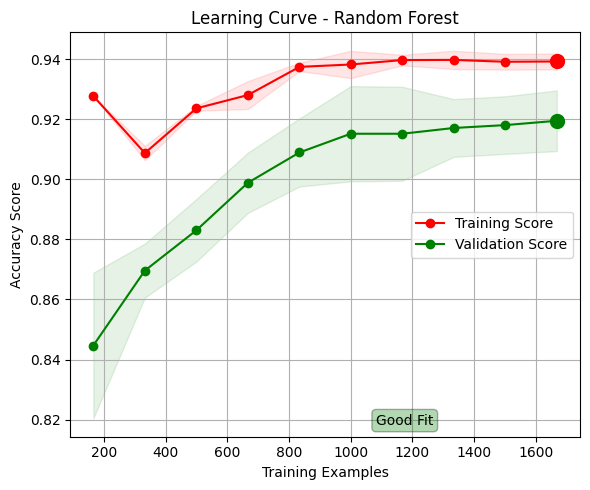

  - Final Training Score: 0.939
  - Final Validation Score: 0.919
  - Gap Training and Validation: 0.020
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.939
F1-Score (Validation): 0.939
AUC (Validation): 0.974
AP (Validation): 0.975

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       130
           1       0.94      0.94      0.94       131

    accuracy                           0.94       261
   macro avg       0.94      0.94      0.94       261
weighted avg       0.94      0.94      0.94       261



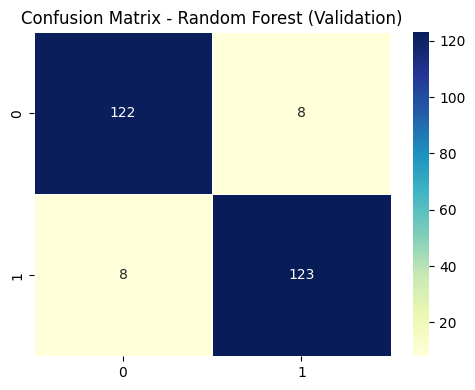

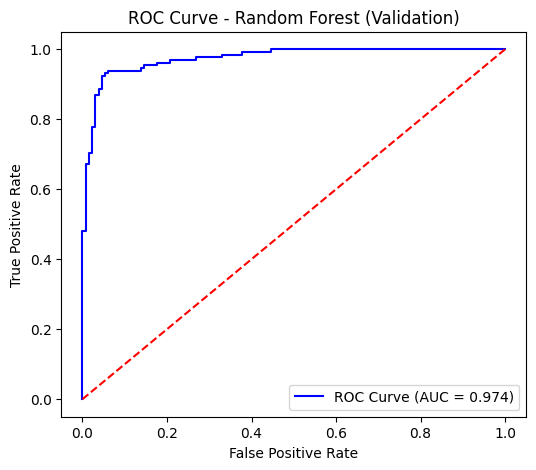

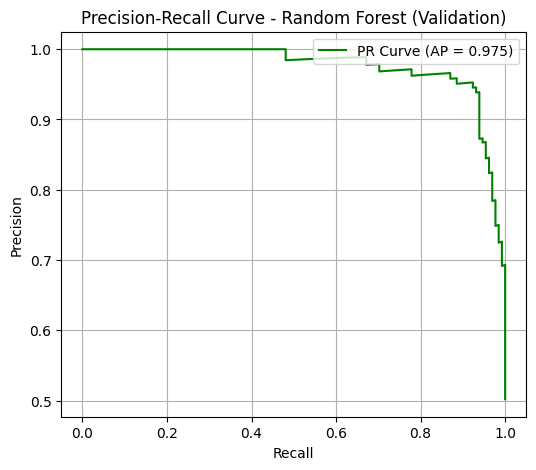


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.908
F1-Score (Test): 0.908
AUC (Test): 0.976
AP (Test): 0.975

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       131
           1       0.90      0.92      0.91       130

    accuracy                           0.91       261
   macro avg       0.91      0.91      0.91       261
weighted avg       0.91      0.91      0.91       261



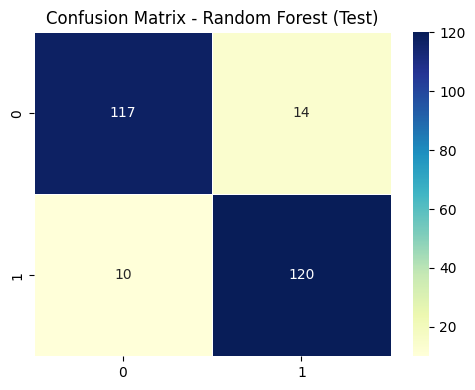

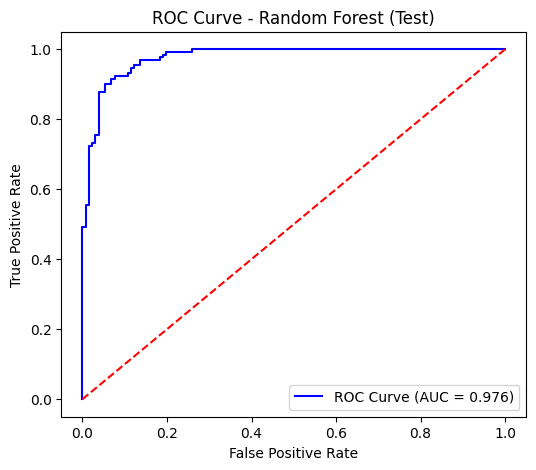

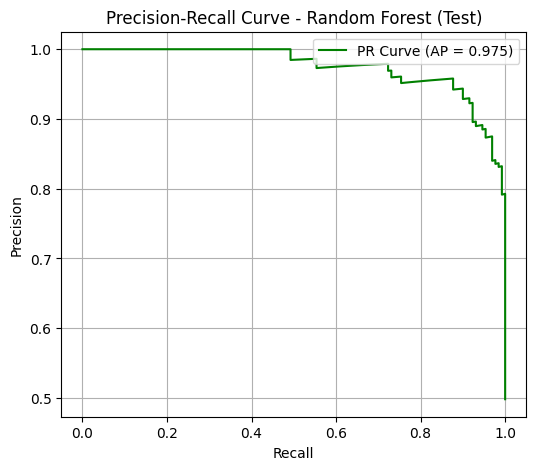


✅ Hasil evaluasi Random Forest disimpan di /content/drive/MyDrive/Data_Analytics/Result/Undersampling/Random Forest/


In [ ]:
evaluator.evaluate("Random Forest")

## Decision Tree


=== Training Set ===

📊 Training Evaluation Results :


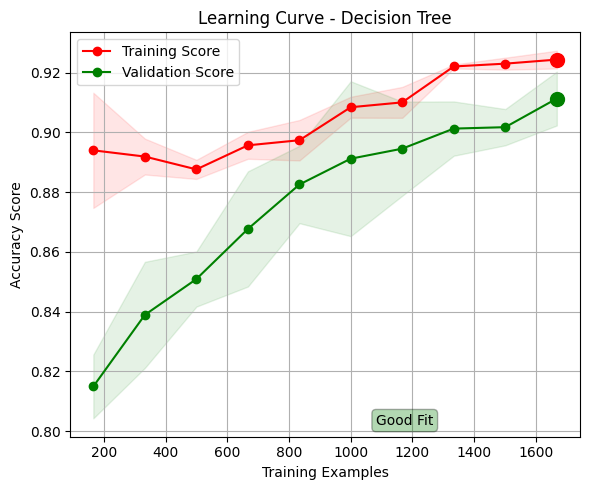

  - Final Training Score: 0.924
  - Final Validation Score: 0.911
  - Gap Training and Validation: 0.013
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.931
F1-Score (Validation): 0.931
AUC (Validation): 0.964
AP (Validation): 0.954

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       130
           1       0.95      0.91      0.93       131

    accuracy                           0.93       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.93      0.93      0.93       261



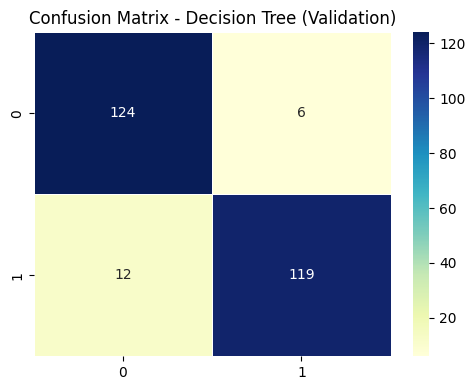

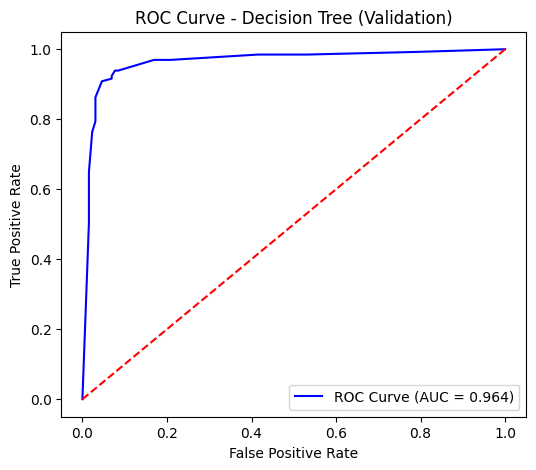

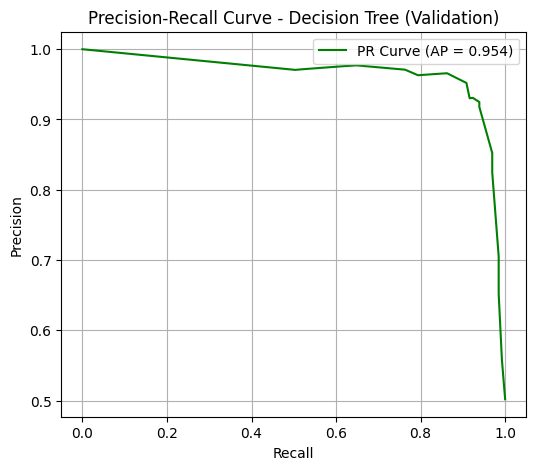


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.908
F1-Score (Test): 0.908
AUC (Test): 0.959
AP (Test): 0.947

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       131
           1       0.91      0.91      0.91       130

    accuracy                           0.91       261
   macro avg       0.91      0.91      0.91       261
weighted avg       0.91      0.91      0.91       261



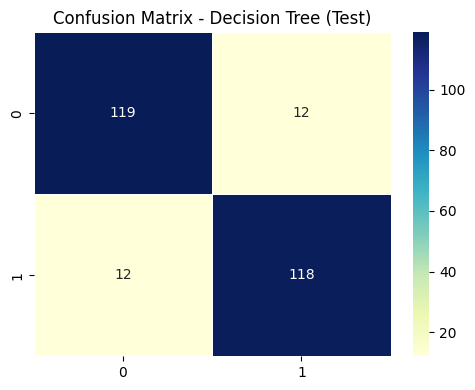

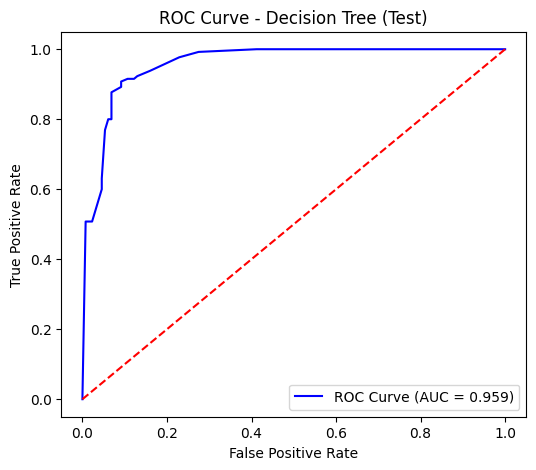

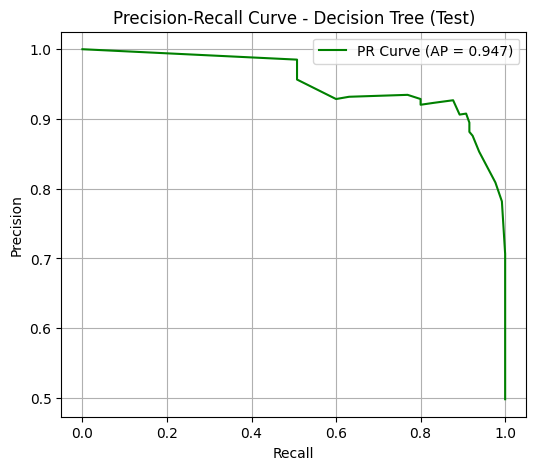


✅ Hasil evaluasi Decision Tree disimpan di /content/drive/MyDrive/Data_Analytics/Result/Undersampling/Decision Tree/


In [ ]:
evaluator.evaluate("Decision Tree")

## XGBoost


=== Training Set ===

📊 Training Evaluation Results :


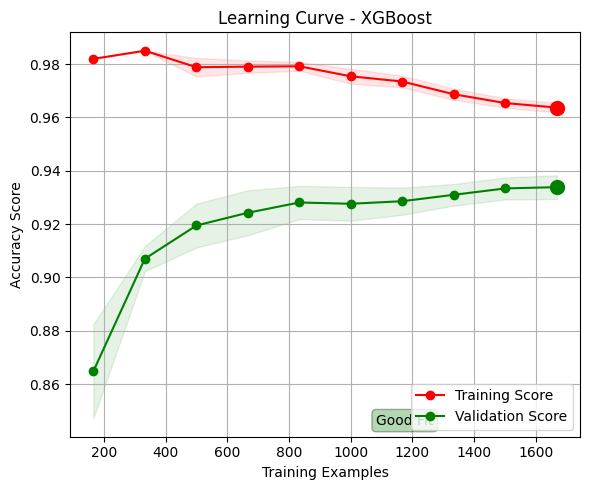

  - Final Training Score: 0.964
  - Final Validation Score: 0.934
  - Gap Training and Validation: 0.030
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.939
F1-Score (Validation): 0.939
AUC (Validation): 0.98
AP (Validation): 0.984

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       130
           1       0.96      0.92      0.94       131

    accuracy                           0.94       261
   macro avg       0.94      0.94      0.94       261
weighted avg       0.94      0.94      0.94       261



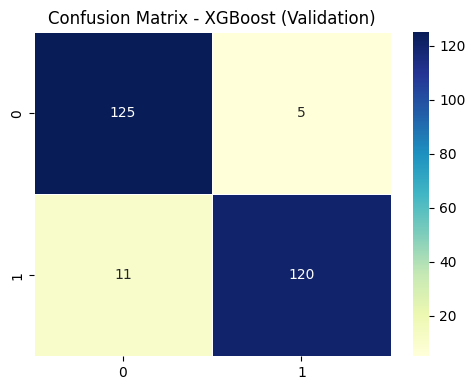

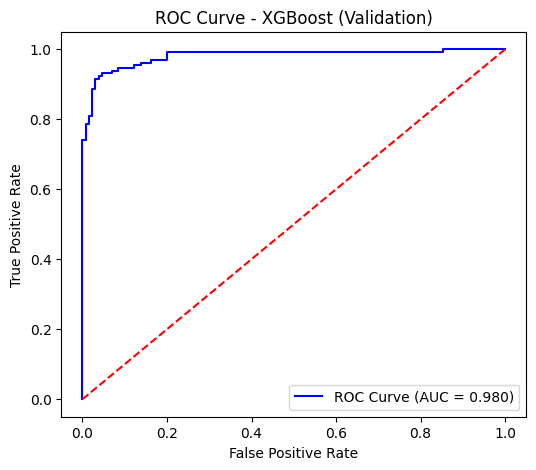

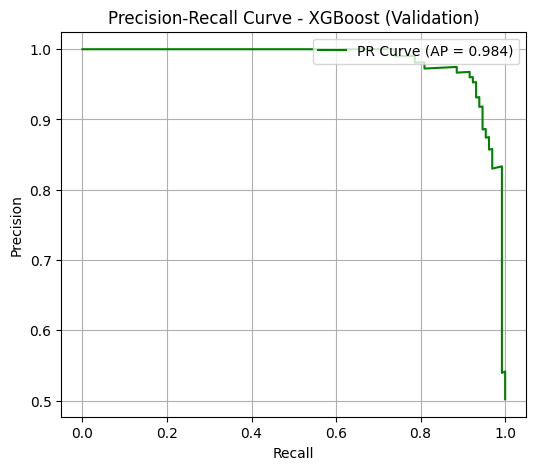


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.939
F1-Score (Test): 0.939
AUC (Test): 0.987
AP (Test): 0.987

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       131
           1       0.95      0.92      0.94       130

    accuracy                           0.94       261
   macro avg       0.94      0.94      0.94       261
weighted avg       0.94      0.94      0.94       261



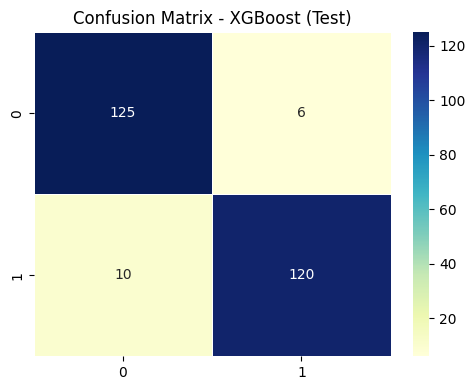

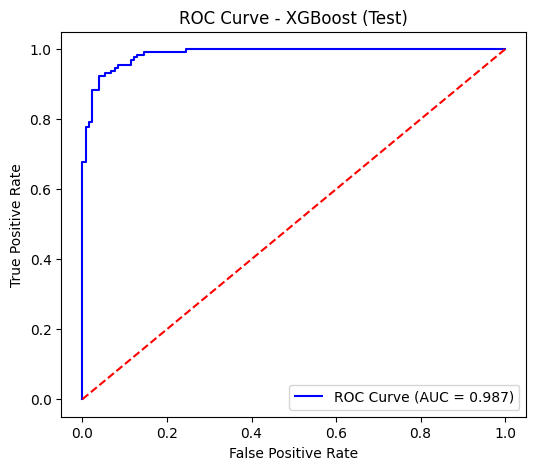

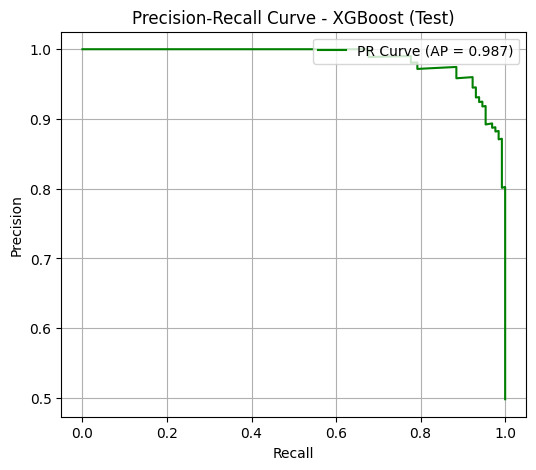


✅ Hasil evaluasi XGBoost disimpan di /content/drive/MyDrive/Data_Analytics/Result/Undersampling/XGBoost/


In [ ]:
evaluator.evaluate("XGBoost")

## Gradient Boosting


=== Training Set ===

📊 Training Evaluation Results :


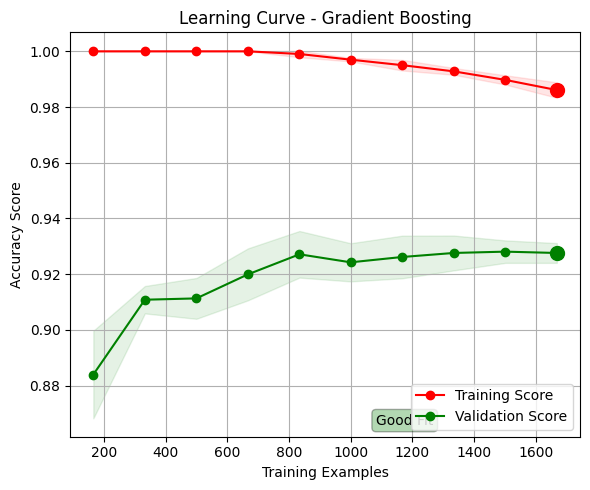

  - Final Training Score: 0.986
  - Final Validation Score: 0.928
  - Gap Training and Validation: 0.058
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.935
F1-Score (Validation): 0.935
AUC (Validation): 0.979
AP (Validation): 0.983

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       130
           1       0.96      0.91      0.93       131

    accuracy                           0.93       261
   macro avg       0.94      0.93      0.93       261
weighted avg       0.94      0.93      0.93       261



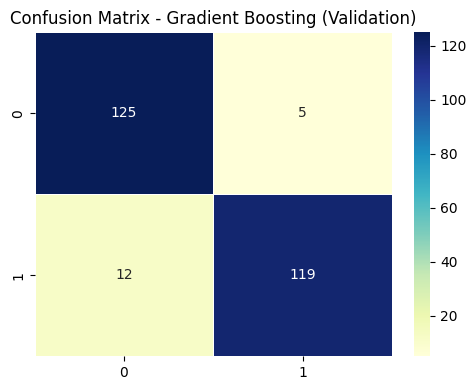

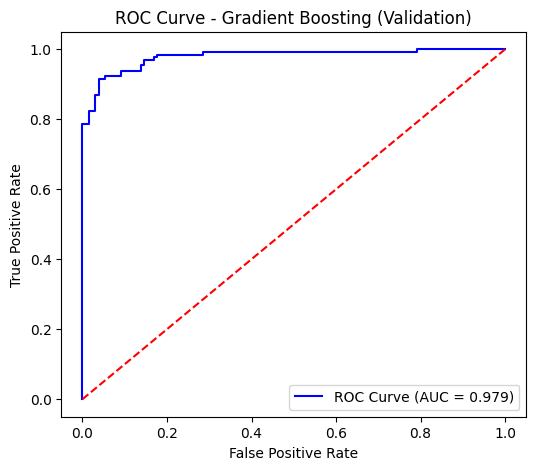

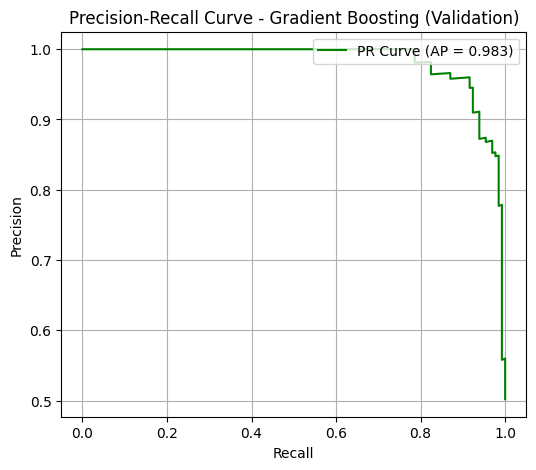


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.923
F1-Score (Test): 0.923
AUC (Test): 0.983
AP (Test): 0.983

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       131
           1       0.93      0.92      0.92       130

    accuracy                           0.92       261
   macro avg       0.92      0.92      0.92       261
weighted avg       0.92      0.92      0.92       261



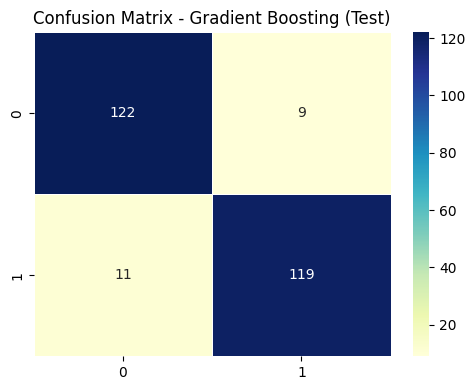

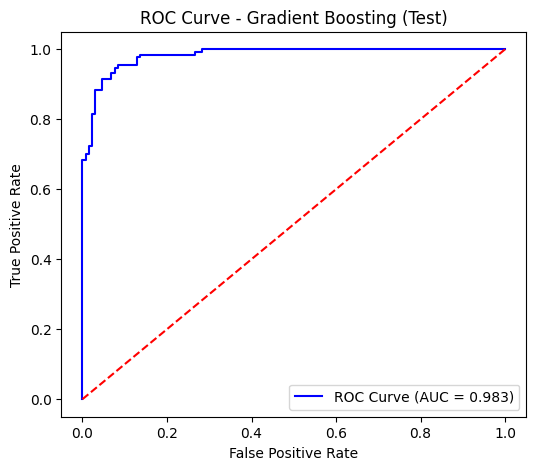

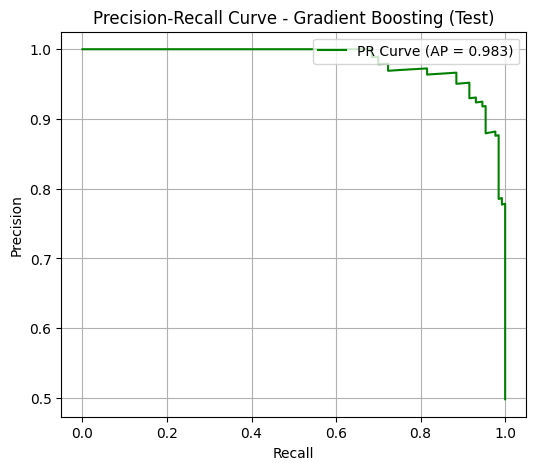


✅ Hasil evaluasi Gradient Boosting disimpan di /content/drive/MyDrive/Data_Analytics/Result/Undersampling/Gradient Boosting/


In [ ]:
evaluator.evaluate("Gradient Boosting")

## CatBoost


=== Training Set ===

📊 Training Evaluation Results :


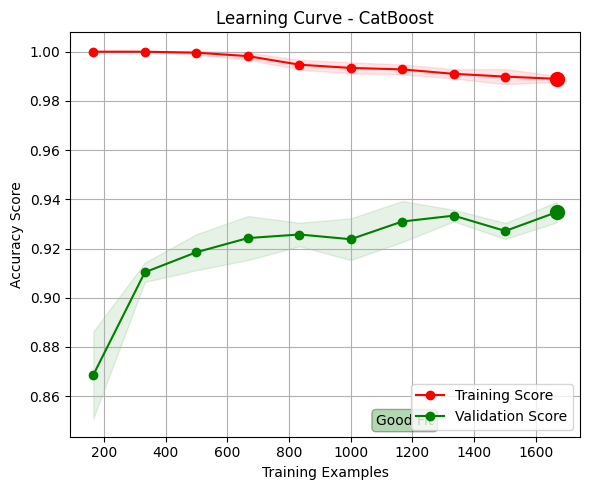

  - Final Training Score: 0.989
  - Final Validation Score: 0.935
  - Gap Training and Validation: 0.054
  - Model Assessment: Good Fit

=== Validation Set ===

📊 Validation Evaluation Results :
Accuracy (Validation): 0.931
F1-Score (Validation): 0.931
AUC (Validation): 0.979
AP (Validation): 0.983

📄 Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       130
           1       0.97      0.89      0.93       131

    accuracy                           0.93       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.93      0.93      0.93       261



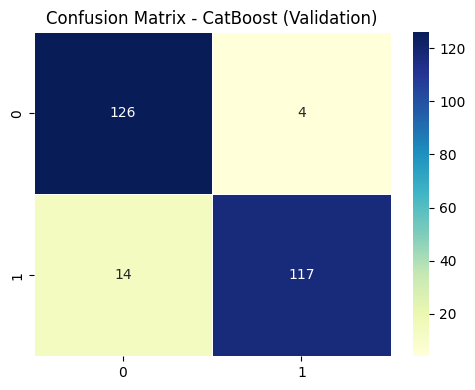

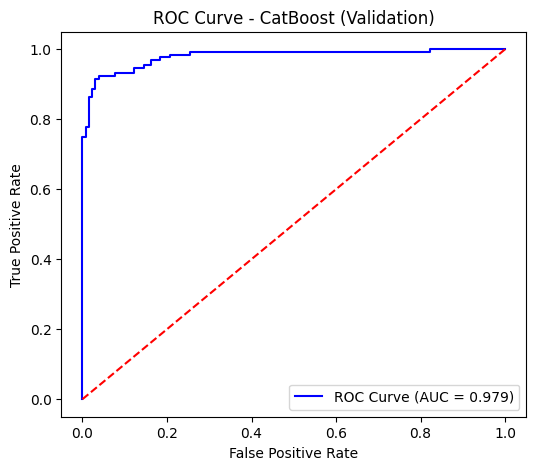

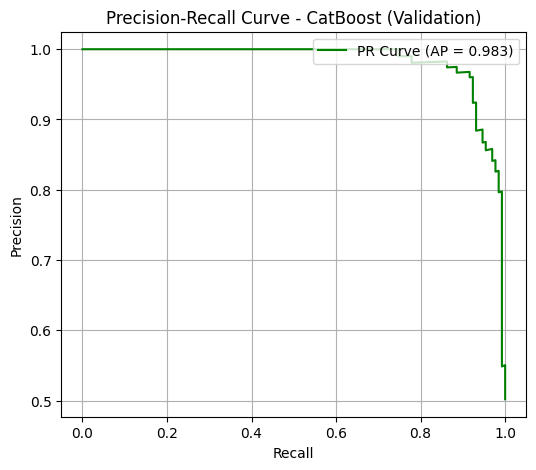


=== Test Set ===

📊 Test Evaluation Results :
Accuracy (Test): 0.946
F1-Score (Test): 0.946
AUC (Test): 0.985
AP (Test): 0.986

📄 Classification Report (Test):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       131
           1       0.96      0.93      0.95       130

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261



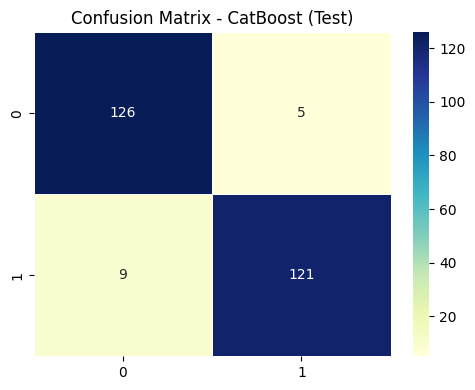

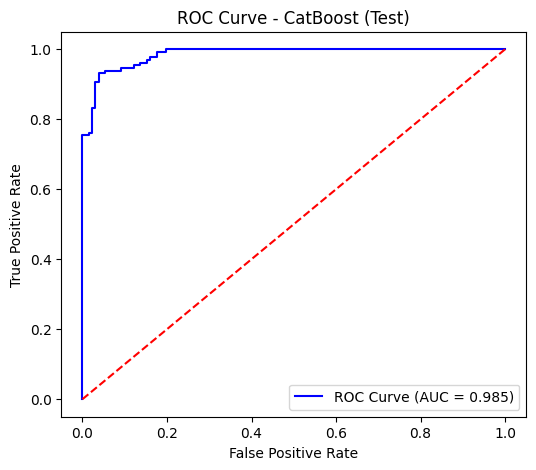

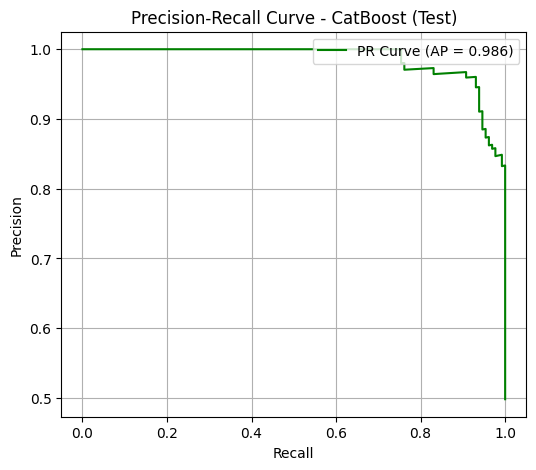


✅ Hasil evaluasi CatBoost disimpan di /content/drive/MyDrive/Data_Analytics/Result/Undersampling/CatBoost/


In [ ]:
evaluator.evaluate("CatBoost")

## Compare All Model

In [3]:
model_names = ["Random Forest", "Decision Tree", "XGBoost", "Gradient Boosting", "CatBoost"]

evaluation_data = {
    "Accuracy (Training)": [],
    "Accuracy (Validation)": [],
    "F1-Score (Validation)": [],
    "AUC (Validation)": [],
    "AP (Validation)": [],
    "Accuracy (Test)": [],
    "F1-Score (Test)": [],
    "AUC (Test)": [],
    "AP (Test)": []
}

for model_name in model_names:
    json_path = os.path.join(result_path, model_name, f"{model_name}_evaluation.json")

    if os.path.exists(json_path):
        with open(json_path, "r") as file:
            eval_result = json.load(file)

        evaluation_data["Accuracy (Training)"].append(eval_result["Accuracy (Training)"])
        evaluation_data["Accuracy (Validation)"].append(eval_result["Accuracy (Validation)"])
        evaluation_data["F1-Score (Validation)"].append(eval_result["F1-Score (Validation)"])
        evaluation_data["AUC (Validation)"].append(eval_result["AUC (Validation)"])
        evaluation_data["Accuracy (Test)"].append(eval_result["Accuracy (Test)"])
        evaluation_data["F1-Score (Test)"].append(eval_result["F1-Score (Test)"])
        evaluation_data["AUC (Test)"].append(eval_result["AUC (Test)"])
        evaluation_data["AP (Validation)"].append(eval_result["AP (Validation)"])
        evaluation_data["AP (Test)"].append(eval_result["AP (Test)"])

df = pd.DataFrame(evaluation_data, index=model_names)

df["Final Score"] = df[[
    "F1-Score (Validation)",
    "AUC (Validation)",
    "AP (Validation)",
    "F1-Score (Test)",
    "AUC (Test)",
    "AP (Test)"
]].mean(axis=1)

df_sorted = df.sort_values(by="Final Score", ascending=False)
display(HTML(df_sorted.to_html()))

,Accuracy (Training),Accuracy (Validation),F1-Score (Validation),AUC (Validation),AP (Validation),Accuracy (Test),F1-Score (Test),AUC (Test),AP (Test),Final Score
XGBoost,0.964,0.939,0.939,0.980,0.984,0.939,0.939,0.987,0.987,0.969333
CatBoost,0.989,0.931,0.931,0.979,0.983,0.946,0.946,0.985,0.986,0.968333
Gradient Boosting,0.986,0.935,0.935,0.979,0.983,0.923,0.923,0.983,0.983,0.964333
Random Forest,0.939,0.939,0.939,0.974,0.975,0.908,0.908,0.976,0.975,0.957833
Decision Tree,0.924,0.931,0.931,0.964,0.954,0.908,0.908,0.959,0.947,0.943833


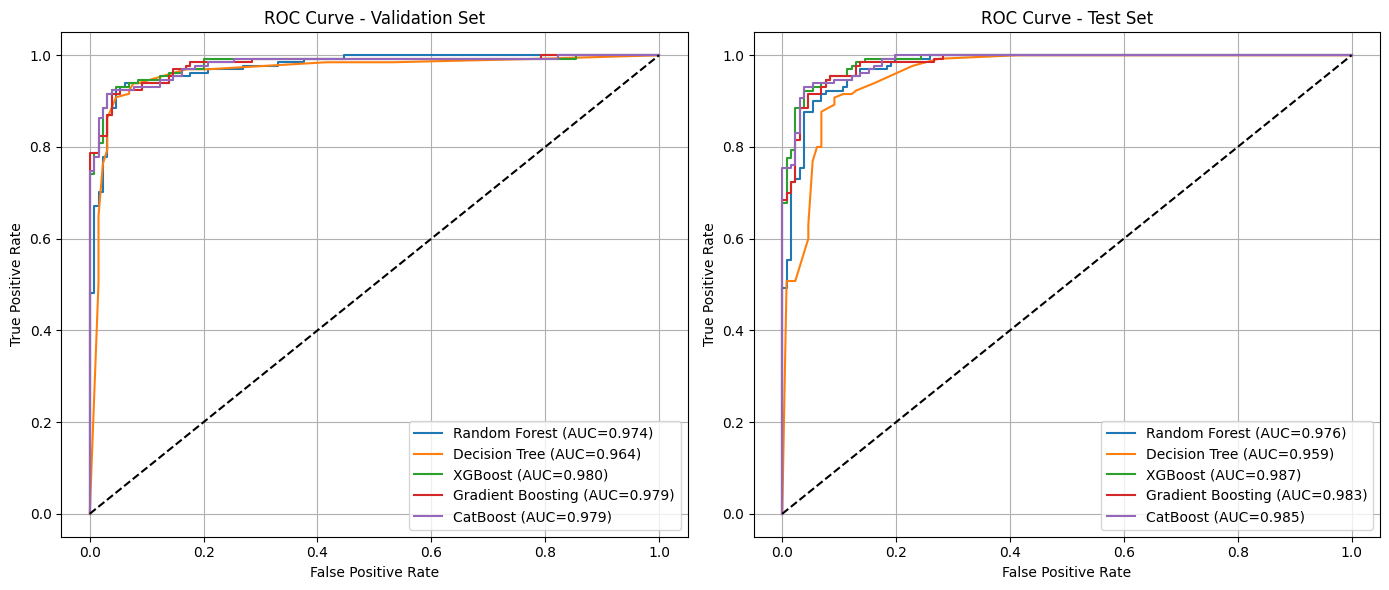

In [ ]:
evaluator.plot_roc_side_by_side()

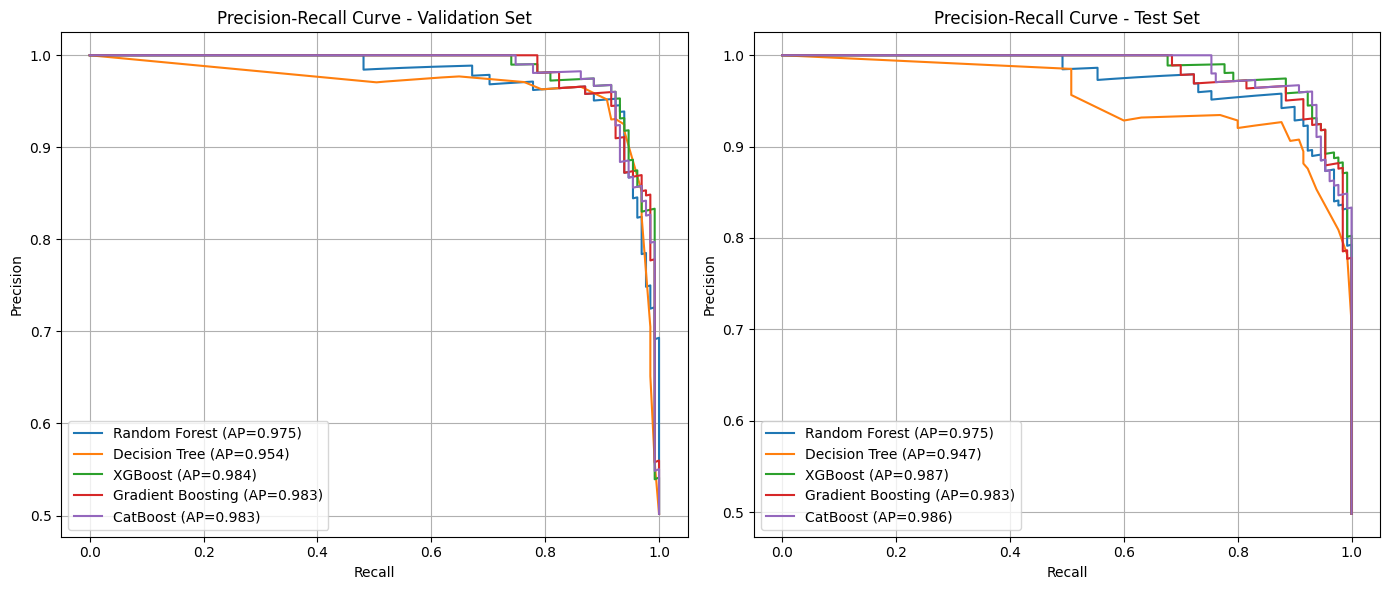

In [ ]:
evaluator.plot_pr_side_by_side()